In [8]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("/tmp/data/", one_hot = True)

Extracting /tmp/data/train-images-idx3-ubyte.gz
Extracting /tmp/data/train-labels-idx1-ubyte.gz
Extracting /tmp/data/t10k-images-idx3-ubyte.gz
Extracting /tmp/data/t10k-labels-idx1-ubyte.gz


design values of network

In [9]:
n_nodes_l1 = 500
n_nodes_l2 = 500
n_nodes_l3 = 500

n_classes = 10
batch_size = 100

x = tf.placeholder('float', [None, 784])
y = tf.placeholder('float')

model

In [10]:
def deepWeb(data):
    layer1 = {'weights': tf.Variable(tf.random_normal([784, n_nodes_l1])),
              'biases': tf.Variable(tf.random_normal([n_nodes_l1]))}
    layer2 = {'weights': tf.Variable(tf.random_normal([n_nodes_l1, n_nodes_l2])),
              'biases': tf.Variable(tf.random_normal([n_nodes_l2]))}
    layer3 = {'weights': tf.Variable(tf.random_normal([n_nodes_l2, n_nodes_l3])),
              'biases': tf.Variable(tf.random_normal([n_nodes_l3]))}


    layerOut = {'weights': tf.Variable(tf.random_normal([n_nodes_l3, n_classes])),
            'biases': tf.Variable(tf.random_normal([n_classes]))}


    #activation function
    l1 = tf.add(tf.matmul(data, layer1['weights']), layer1['biases'])
    l1 = tf.nn.relu(l1)
    l2 = tf.add(tf.matmul(l1, layer2['weights']), layer2['biases'])
    l2 = tf.nn.relu(l2)
    l3 = tf.add(tf.matmul(l2, layer3['weights']), layer3['biases'])
    l3 = tf.nn.relu(l3)

    outl = tf.add(tf.matmul(l3, layerOut['weights']), layerOut['biases'])

    # return output

    return outl

In [14]:
def train(input):
    prediction = deepWeb(input)
    #how label is decided?
    cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=prediction, labels=y))
    optimizer = tf.train.AdamOptimizer().minimize(cost)

    n_epochs = 10
    with tf.Session() as sess:
        sess.run(tf.global_variables_initializer())

        
        for epoch in range(n_epochs):
            epoch_cost = 0
            for _ in range (int(mnist.train.num_examples/batch_size)):
                #check whar is tranin next
                epoch_data, epoch_lable = mnist.train.next_batch(batch_size)
                #how come to current situation
                _, c = sess.run([optimizer, cost], feed_dict={x: epoch_data, y: epoch_lable})
                epoch_cost += c

            print('Epoch', epoch + 1, 'out of', n_epochs, 'cost', epoch_cost)

            correct = tf.equal(tf.argmax(prediction, 1), tf.argmax(y, 1))
            accuracy = tf.reduce_mean(tf.cast(correct, "float"))
            print("Accuracy ", accuracy.eval({x: mnist.test.images, y: mnist.test.labels}))

In [16]:
train(x)

Epoch 1 out of 10 cost 2068192.70808
Accuracy  0.8911
Epoch 2 out of 10 cost 2520552.42079
Accuracy  0.9233
Epoch 3 out of 10 cost 2763680.35926
Accuracy  0.9283
Epoch 4 out of 10 cost 2909656.26728
Accuracy  0.9385
Epoch 5 out of 10 cost 3003452.47509
Accuracy  0.9398
Epoch 6 out of 10 cost 3062582.95981
Accuracy  0.9443
Epoch 7 out of 10 cost 3103882.53554
Accuracy  0.9414
Epoch 8 out of 10 cost 3133447.60414
Accuracy  0.9488
Epoch 9 out of 10 cost 3158461.91963
Accuracy  0.9512
Epoch 10 out of 10 cost 3179290.14206
Accuracy  0.9509


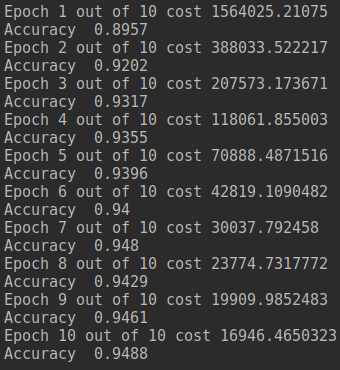

In [13]:
#displaying output
from IPython.display import Image
Image(filename='./img/deepnet_out.png')

In [19]:
![title](img/deepnet_out.png)

/bin/sh: 1: Syntax error: word unexpected (expecting ")")
